In [ ]:
import requests
from bs4 import BeautifulSoup

import json

from tqdm.notebook import tqdm

import pandas as pd

In [ ]:
reviews = {
    '댓글' : [],
    '공감수' : [],
    '비공감수' : []
}

In [ ]:
# 웹툰 하나 정해서, 최신화의 베스트댓글 가져오기(데드퀸)

url = 'https://apis.naver.com/commentBox/cbox/web_naver_list_jsonp.json?'


params ={
        'ticket' : 'comic',  
        'templateId' : 'webtoon',  
        'pool' : 'cbox3',  
        '_callback' : '', # jQuery112409091552467251651_1615854232166 -> ''  
        'lang' : 'ko',  
        'country' : 'KR',  
        'objectId' : '753478_81', # 웹툰의 고유 아이디_해당화 인덱스  
        'pageSize' : 15,  
        'indexSize' : 10,  
        'listType' : 'OBJECT',  
        'pageType' : 'default',  
        'page' : 1, # 전체댓글의 페이지 번호 
        'refresh' : 'true',  
        }

headers = {
        'referer': 'https://comic.naver.com/comment/comment.nhn?titleId=650305&no=298',
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/88.0.4324.146 Safari/537.36'

}

resp = requests.get(url, params=params, headers=headers)
 
resp

<Response [200]>

In [ ]:
resp.text

'_callback({"success":true,"code":"1000","message":"요청을 성공적으로 처리하였습니다.","lang":"ko","country":"KR","result":{"commentList":[{"ticket":"comic","objectId":"753478_81","categoryId":"*","templateId":"default_v2","commentNo":"434681627","parentCommentNo":"434681627","replyLevel":1,"replyCount":50,"replyAllCount":56,"replyPreviewNo":null,"replyList":null,"imageCount":0,"imageList":null,"imagePathList":null,"imageWidthList":null,"imageHeightList":null,"commentType":"txt","stickerId":null,"sticker":null,"sortValue":1646316073906,"contents":"와 근데 안톤도 민지 눈치 못 챈 거네 그럼 ㅋㅋㅋ 대체 민지좌 스텔스 능력은 어디까지냐","userIdNo":"bceVH","exposedUserIp":null,"lang":"ko","country":"KR","idType":"naver","idProvider":"naver","userName":"요고","userProfileImage":"https://profile-phinf.pstatic.net/03049/e4e072d96391fc7a6dbb10f1a42bcd69a401a534dc5b1a76070d39309d3a5890.jpg","profileType":"naver","modTime":"2022-03-03T23:01:14+0900","modTimeGmt":"2022-03-03T14:01:14+0000","regTime":"2022-03-03T23:01:14+0900","regTimeGmt":"2022-03-0

In [ ]:
jsn = resp.text[10:-2]

dict_resp = json.loads(jsn)
dict_resp

{'code': '1000',
 'country': 'KR',
 'date': '2022-03-31T02:20:34+0000',
 'lang': 'ko',
 'message': '요청을 성공적으로 처리하였습니다.',
 'result': {'bestList': [],
  'commentList': [{'anonymous': False,
    'antipathy': False,
    'antipathyCount': 37,
    'best': True,
    'blind': False,
    'blindReport': False,
    'categoryId': '*',
    'categoryImage': None,
    'commentNo': '434681627',
    'commentType': 'txt',
    'containText': True,
    'contents': '와 근데 안톤도 민지 눈치 못 챈 거네 그럼 ㅋㅋㅋ 대체 민지좌 스텔스 능력은 어디까지냐',
    'country': 'KR',
    'defamation': False,
    'deleted': False,
    'expose': True,
    'exposeByCountry': False,
    'exposedUserIp': None,
    'extension': None,
    'grades': None,
    'hiddenByCleanbot': False,
    'hideReplyButton': False,
    'idNo': 'bceVH',
    'idProvider': 'naver',
    'idType': 'naver',
    'imageCount': 0,
    'imageHeightList': None,
    'imageList': None,
    'imagePathList': None,
    'imageWidthList': None,
    'lang': 'ko',
    'levelCode': None,
    'mana

In [ ]:
# 'result' 'commentList' [] 'contents', 'antipathyCount', 'sympathyCount'
# reviews = {
#     '댓글' : [],
#     '공감수' : [],
#     '비공감수' : []
# }
commentList = dict_resp['result']['commentList']
# len(commentList)

for comment in commentList:
    reviews['댓글'].append(comment['contents'])
    reviews['공감수'].append(comment['sympathyCount'])
    reviews['비공감수'].append(comment['antipathyCount'])

In [ ]:
df_reviews = pd.DataFrame(reviews)
df_reviews

,댓글,공감수,비공감수
0,와 근데 안톤도 민지 눈치 못 챈 거네 그럼 ㅋㅋㅋ 대체 민지좌 스텔스 능력은 어디까지냐,8026,37
1,그와중에 한희는 힐데 쪽 이상한거 눈치채고 있었나보네 ㄷㄷ,6241,14
2,떡상의 사나이 핏불 가나요?,4247,12
3,똥개 욕 돌려까기 ㅁ쳤네ㄱ ㅋㅋㅋㅋ,4095,26
4,협상을 성공한적이 없는 협상 전문 요원 ㅋㅋㅋㅋㅋ,3988,10
5,한희 바로 눈치채는거봐.. 외모 지능 능력 빠지는게 없다 정말ㅋㅋㅋㅋㅋㅋㅋㅋㅋ,2797,18
6,오 한희 똑똑해 눈치챘구나,1883,8
7,안톤이 멈추라고 한거 민지 기척 느끼고 멈추라고 한거 맞는거 같은데..? \n\n핏...,1384,70
8,아니 안톤이 민지를 눈치채고 핏불이 얻어걸린 거 아냐?ㅋㅋㅋㅋㅋㅋㅋ,1287,18
9,영칠아 너도 한희 관상만 봐도 아는거지? 걍 의심없이 믿어도 될 존재인거,896,7


In [ ]:
# 웹툰 하나 정해서, 전체 화(1화~최신화)의 베스트댓글 가져오기(데드퀸)

# 화 인덱스 포함해서 저장 

reviews = {
    '댓글' : [],
    '공감수' : [],
    '비공감수' : [],
    '화' : []
}

In [ ]:
for idx in range(1, 82):
    url = 'https://apis.naver.com/commentBox/cbox/web_naver_list_jsonp.json?'


    params ={
            'ticket' : 'comic',  
            'templateId' : 'webtoon',  
            'pool' : 'cbox3',  
            '_callback' : '', # jQuery112409091552467251651_1615854232166 -> ''  
            'lang' : 'ko',  
            'country' : 'KR',  
            'objectId' : '753478_'+str(idx), # 웹툰의 고유 아이디_해당화 인덱스  
            'pageSize' : 15,  
            'indexSize' : 10,  
            'listType' : 'OBJECT',  
            'pageType' : 'default',  
            'page' : 1, # 전체댓글의 페이지 번호 
            'refresh' : 'true',  
            }

    headers = {
            'referer': 'https://comic.naver.com/comment/comment.nhn?titleId=650305&no=298',
        'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/88.0.4324.146 Safari/537.36'

    }

    resp = requests.get(url, params=params, headers=headers)

    jsn = resp.text[10:-2]

    dict_resp = json.loads(jsn)

    commentList = dict_resp['result']['commentList']
    # len(commentList)

    for comment in commentList:
        reviews['댓글'].append(comment['contents'])
        reviews['공감수'].append(comment['sympathyCount'])
        reviews['비공감수'].append(comment['antipathyCount'])  
        reviews['화'].append(idx)

In [ ]:
df_reviews = pd.DataFrame(reviews)
df_reviews

,댓글,공감수,비공감수,화
0,개장수가 나오기전까진 모두 프롤로그일 뿐이다,23358,109,1
1,개장수!!!!할아브!!!!!! 우리 할아브님 어디가셨어!!!!!!!! 그래도 Q3작...,13361,150,1
2,자문을 받았다는 군사 컨설팅 기업이 혹시 무사트인가요?,13073,235,1
3,다시 한 번 보니까 저 한희라는 여자애가 맨 처음에 나온 흰머리 곤충인간이고 옆에서...,8636,134,1
4,김규삼은 무사트에게 자문을 받았다.,5463,159,1
...,...,...,...,...
1210,민지 총이 적힌 주현이란 글씨 .. 주현이 잊지 맙시다..,806,12,81
1211,힐데 쌍욕하는것도 섹시하네...,787,26,81
1212,이번 화 킬포는 한희가 힐데가 연기하는거 눈치까고 영칠이 살려준거임 \n이미 헨슬로...,728,4,81
1213,민지가 들킨거임.. 안톤이 뒤를 보면서 뭔가 캐치했다는 모션이 나오는데 핏불은 안...,548,23,81


In [ ]:
# 코드 상에서 원하는 웹툰을 입력하면, 원하는 웹툰의 전체화 베스트 댓글 가져오도록 만들기
## 원하는 웹툰의 고유아이디를 직접 타이핑 X
## 웹툰 제목을 입력받아, 해당 웹툰의 고유 아이디, 최신화 정보를 조회 -> 크롤링 시작

### 모든 웹툰의 고유아이디, 최신화 정보 미리 저장되어야 한다!!!

In [ ]:
# 1. 모든 웹툰의 고유아이디, 최신화 정보 크롤링 

### 고유아이디 어떻게 가져올까?
### https://comic.naver.com/webtoon/weekday 해당 페이지에서
### 섬네일을 감싸고 있는 a태그의 
### href 속성 (url) 안에서 
### titleId 값 파싱하기


### 최신화 정보는 어떻게 가져올까?
### 선행) 각 웹툰의 페이지 url 수집 -> where? https://comic.naver.com/webtoon/weekday 해당 페이지에서

### 각 웹툰의 페이지로 이동해서 
### 최신화 버튼 태그의 href 속성 (url) 안에서
### no 값 파싱하기

webtoon_info = {}

url = 'https://comic.naver.com/webtoon/weekday'

resp = requests.get(url)

soup = BeautifulSoup(resp.content, 'lxml')
title_tags = soup.select('a.title')

for title_tag in title_tags:
    # webtoon_info 에 title은 키값, url은 첫번째 밸류
    # webtoon_info = {
    #            '신의탑' : {'url' : 'https://comic.naver.com'+'/webtoon/list?titleId=758037&weekday=mon'}
    # }
    title = title_tag['title']
    url = title_tag['href']

    # titleId 
    title_id = url.lstrip('/webtoon/list?titleId=').split('&')[0]

    # no
    ## 웹툰 페이지 정보 get
    toon_resp = requests.get('https://comic.naver.com'+url)
    toon_soup = BeautifulSoup(toon_resp.content, 'lxml')
    toon_tit_tags = toon_soup.select('td.title a')
    toon_new_url = toon_tit_tags[0]['href']

    new_no = toon_new_url.split('&')[1].replace('no=', '')

    webtoon_info[title] = {'url' : 'https://comic.naver.com'+url,
                           'title_id' : title_id,
                           'new_no' : new_no
                           }
    
webtoon_info

{'100': {'new_no': '20',
  'title_id': '783549',
  'url': 'https://comic.naver.com/webtoon/list?titleId=783549&weekday=tue'},
 '1을 줄게': {'new_no': '27',
  'title_id': '773522',
  'url': 'https://comic.naver.com/webtoon/list?titleId=773522&weekday=tue'},
 '1초': {'new_no': '159',
  'title_id': '725586',
  'url': 'https://comic.naver.com/webtoon/list?titleId=725586&weekday=fri'},
 '2-3승강장': {'new_no': '49',
  'title_id': '770019',
  'url': 'https://comic.naver.com/webtoon/list?titleId=770019&weekday=sat'},
 '66666년 만에 환생한 흑마법사': {'new_no': '40',
  'title_id': '775141',
  'url': 'https://comic.naver.com/webtoon/list?titleId=775141&weekday=wed'},
 '6월의 라벤더': {'new_no': '1',
  'title_id': '791937',
  'url': 'https://comic.naver.com/webtoon/list?titleId=791937&weekday=sun'},
 '7FATES: CHAKHO': {'new_no': '12',
  'title_id': '786978',
  'url': 'https://comic.naver.com/webtoon/list?titleId=786978&weekday=sat'},
 '99강화나무몽둥이': {'new_no': '1',
  'title_id': '792651',
  'url': 'https://comic.naver.

In [ ]:
# 2. 원하는 웹툰 제목 입력 -> 해당 웹툰의 고유아이디, 최신화정보 조회
myToon = input('어떤 웹툰의 댓글을 크롤링해올까요?')

어떤 웹툰의 댓글을 크롤링해올까요?외모지상주의


In [ ]:
print(webtoon_info[myToon]['new_no'])
print(webtoon_info[myToon]['title_id'])

my_new_no = webtoon_info[myToon]['new_no']
my_title_id = webtoon_info[myToon]['title_id']

384
641253


In [ ]:
def func(a, b):
    result = a + b
    return result

In [ ]:
value = func(3, 5)

In [ ]:
value

8

In [ ]:
# 3. 해당 웹툰의 전체화 베스트댓글 크롤링
## 댓글 크롤링 모듈 만들기 (입력파라미터 : 웹툰고유아이디, 최신화정보, 베스트댓글(디폴트)/전체댓글)
##                         (return 값 : reviews)

def webtoonReviewCrwal(my_title_id, my_new_no, best=True):
    reviews = {
        '댓글' : [],
        '공감수' : [],
        '비공감수' : [],
        '화' : []
    }

    for idx in tqdm(range(1, int(my_new_no)+1)):
        url = 'https://apis.naver.com/commentBox/cbox/web_naver_list_jsonp.json?'

        params ={
                'ticket' : 'comic',  
                'templateId' : 'webtoon',  
                'pool' : 'cbox3',  
                '_callback' : '', # jQuery112409091552467251651_1615854232166 -> ''  
                'lang' : 'ko',  
                'country' : 'KR',  
                'objectId' : my_title_id+'_'+str(idx), # 웹툰의 고유 아이디_해당화 인덱스  
                'pageSize' : 15,  
                'indexSize' : 10,  
                'listType' : 'OBJECT',  
                'pageType' : 'default',  
                'page' : 1, # 전체댓글의 페이지 번호 
                'refresh' : 'true',  
                }

        if not best: # best가 False라면 == 전체댓글이라면
            params['sort'] = 'NEW'

        headers = {
                'referer': 'https://comic.naver.com/comment/comment.nhn?titleId=650305&no=298',
            'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/88.0.4324.146 Safari/537.36'

        }

        resp = requests.get(url, params=params, headers=headers)

        jsn = resp.text[10:-2]

        dict_resp = json.loads(jsn)

        commentList = dict_resp['result']['commentList']
        # len(commentList)

        for comment in commentList:
            reviews['댓글'].append(comment['contents'])
            reviews['공감수'].append(comment['sympathyCount'])
            reviews['비공감수'].append(comment['antipathyCount'])  
            reviews['화'].append(idx)
        
    return reviews

In [ ]:
reviews = webtoonReviewCrwal(my_new_no=my_new_no, my_title_id=my_title_id)

  0%|          | 0/384 [00:00<?, ?it/s]

In [ ]:
df_reviews = pd.DataFrame(reviews)
df_reviews

,댓글,공감수,비공감수,화
0,내새끼가 남한테 아무 이유 없이 맞고다니는 모습 보면 엄마는 가슴이 얼마나 아플까,129107,1152,1
1,어머님이 너무 안타깝다....ㅠㅠ,72694,844,1
2,이게 드뎌 나왓구나,55827,1258,1
3,마음아파서 못보겠다,52171,1043,1
4,자자 위로 모십시다,43768,1387,1
...,...,...,...,...
5755,\n⠀⠀⠀⠀⠀⠀⠀⠀⢀⣀⣠⣤⣄⣀⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀\n⠀⠀⠀⠀⢀⣤⣶⣾⣿⣿⣿⣿⣿⣿⣿⣷⣶...,5230,60,384
5756,⣿⣿⣿⣿⣿⣿⣿⣿⠋⠀⠀⠀⠙⠿⣿⣿⣿⡿⠟⠁⠀⠀⠀⠙⣿⣿⣿⣿⣿⣿⣿\n⠛⠛⠛⠛⠉⠉⣿⡃⠀⠀⠀⠀⠀...,4890,93,384
5757,\n⣏⣿⣾⡧⣻⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣏⣿⢻⣿\n⡏⠛⠇⠓⣽⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿...,4637,181,384
5758,세키와케는 일본 스모 계급 2위를 뜻하는데 아마 1위에게 계속 져서 뒤치기하고 여기온듯,3613,102,384


In [ ]:
import seaborn as sns

In [ ]:
df_reviews['공감수'].describe()

count      5760.000000
mean      25927.300868
std       32055.710069
min          16.000000
25%        5927.750000
50%       14012.500000
75%       32934.000000
max      355075.000000
Name: 공감수, dtype: float64

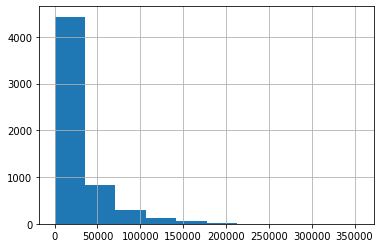

In [ ]:
df_reviews['공감수'].hist()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44277 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44048 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44277 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44048 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text

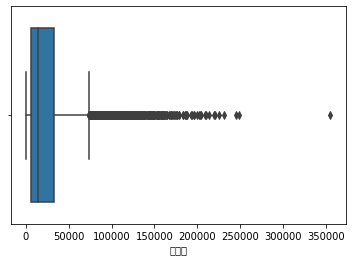

In [ ]:
sns.boxplot(df_reviews['공감수'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44277 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44048 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44277 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44048 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text

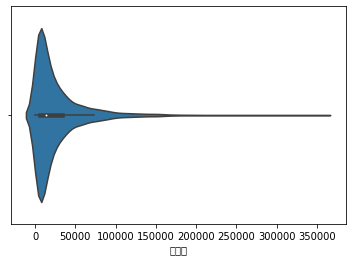

In [ ]:
sns.violinplot(df_reviews['공감수'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44277 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44048 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44277 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44048 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text

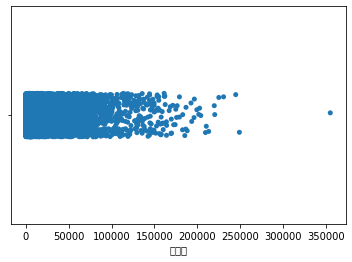

In [ ]:
sns.stripplot(df_reviews['공감수'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 84.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44277 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44048 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44277 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44048 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text

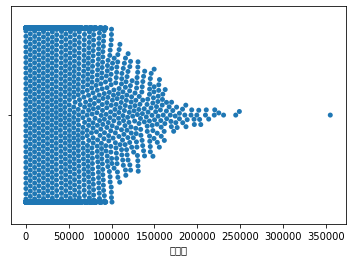

In [ ]:
sns.swarmplot(df_reviews['공감수'])